# Baseline Analysis

In [1]:
import tempfile
import os
import numpy as np
from msmbuilder.example_datasets import FsPeptide
from msmbuilder.dataset import dataset
from msmbuilder.featurizer import DihedralFeaturizer
from sklearn.decomposition import PCA
import mdtraj as md
import msmbuilder
import msmbuilder.utils as msmUtils
from msmbuilder.tpt import mfpts
import matplotlib.pyplot as plt
from scipy import stats

C:\Users\Christian\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Christian\Anaconda2\envs\py36\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
%matplotlib inline

In [3]:
# Base path for all files
#base = 'C:\Users\MinCheol\Documents\TJ_data'
#base = 'C:\\Users\\minch_000\\Documents\\TJ_data'
base = 'C:\\Users\\Christian\Documents\\GitHub\\Protein_Dynamics_TJ\\MSM_Builder_Test\\Sherlock_Data'

## FsPeptide Baseline MFPT

#### MFPT vs RMSD Plots

In [4]:
# import the msm, raw XYZ coordinates, and the cluster assignments
fs_msm = msmUtils.load(base + '\\fspeptide\\msm\\msm.pkl')
X = np.loadtxt(base + '\\fspeptide\sim_datasets\\raw_XYZ_15000.csv', delimiter=',')
cluster_assignments = np.loadtxt(base + '\\fspeptide\msm\msm_clustering_labels.csv', delimiter=',')
chosen_indices = np.loadtxt(base + '\\fspeptide\msm\indices_15000.csv', delimiter=',')

In [6]:
# Collect MFPT
fs_mfpt_matrix = (mfpts(fs_msm) + mfpts(fs_msm).T)/2

In [28]:
# Parameters for MFPT plots
num_frames = X.shape[0]
num_points = 500

[ 40.  40.  40. ...,  28.  28.  28.]


In [8]:
distances = []
mfpt_times = []
for p in range(num_points):
    frame_pair = np.random.randint(low=0, high=num_frames-1, size=2) # frame number in sim_data
    true_frame_pair = (int(chosen_indices[frame_pair[0]]), int(chosen_indices[frame_pair[1]])) # corresponding original frame numbers
    msm_frame_pair = (fs_msm.mapping_[cluster_assignments[true_frame_pair[0]]], fs_msm.mapping_[cluster_assignments[true_frame_pair[1]]])
    if msm_frame_pair[0] != msm_frame_pair[1] and fs_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]] > 0:
        distances.append(np.linalg.norm(X[frame_pair[0],:] - X[frame_pair[1], :]))
        mfpt_times.append(fs_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]])

In [39]:
distances = []
mfpt_times = []
for p in range(num_points):
    frame_pair = np.random.randint(low=0, high=num_frames-1, size=2) # frame number in sim_data
    msm_frame_pair = (fs_msm.mapping_[cluster_assignments[frame_pair[0]]], fs_msm.mapping_[cluster_assignments[frame_pair[1]]])
    if msm_frame_pair[0] != msm_frame_pair[1] and fs_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]] > 0:
        distances.append(np.linalg.norm(X[frame_pair[0],:] - X[frame_pair[1], :]))
        mfpt_times.append(fs_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]])

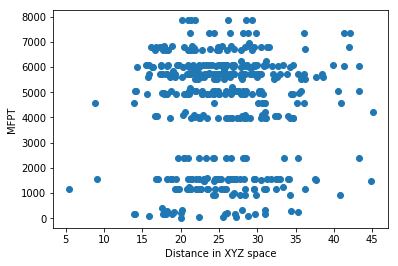

In [40]:
plt.scatter(np.array(distances), np.array(mfpt_times))
plt.xlabel('Distance in XYZ space')
plt.ylabel('MFPT')

In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.array(distances),np.log(np.log(np.array(mfpt_times))))
print(r_value)

0.00991315443417


## Calmodulin Baseline MFPT

#### MFPT vs RMSD Plots

In [53]:
# import the msm, raw XYZ coordinates, and the cluster assignments
cal_msm = msmUtils.load(base + '\\apo_calmodulin\msm\msm.pkl')
X = np.loadtxt(base + '\\apo_calmodulin\sim_datasets\\raw_XYZ_10000.csv', delimiter=',')
cluster_assignments = np.loadtxt(base + '\\apo_calmodulin\msm\msm_clustering_labels.csv', delimiter=',')
chosen_indices = np.loadtxt(base + '\\apo_calmodulin\msm\indices_10000.csv', delimiter=',')

In [54]:
# Collect MFPT
cal_mfpt_matrix = (mfpts(cal_msm) + mfpts(cal_msm).T)/2

In [55]:
# Parameters for MFPT plots
num_frames = X.shape[0]
num_points = 5000

In [58]:
distances = []
mfpt_times = []
for p in range(num_points):
    frame_pair = np.random.randint(low=0, high=num_frames-1, size=2) # frame number in sim_data
    true_frame_pair = (int(chosen_indices[frame_pair[0]]), int(chosen_indices[frame_pair[1]])) # corresponding original frame numbers
    msm_frame_pair = (cal_msm.mapping_[cluster_assignments[true_frame_pair[0]]], cal_msm.mapping_[cluster_assignments[true_frame_pair[1]]])
    if msm_frame_pair[0] != msm_frame_pair[1] and cal_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]] > 0:
        distances.append(np.linalg.norm(X[frame_pair[0],:] - X[frame_pair[1], :]))
        mfpt_times.append(cal_mfpt_matrix[msm_frame_pair[0]][msm_frame_pair[1]])

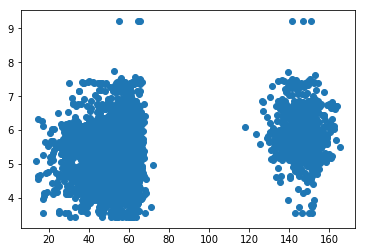

In [59]:
plt.scatter(np.array(distances), np.log(np.array(mfpt_times)))